In [104]:
import os
import imageio

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [174]:
def display_time(seconds):
    if seconds <= 60:
        print('Duration: %f (s)' %seconds)
    elif 60 < seconds <= 3600:
        print('Duration: %f (min)' %(seconds/60))
    else:
        print('Duration: %f (h)' %(seconds/3600))

In [105]:
im = imageio.imread('Spectrograms_original/1001_DFA_ANG_XX.png')
print(im.shape)

(278, 396, 4)


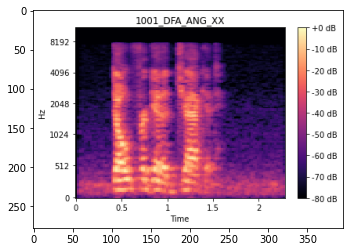

In [106]:
plt.imshow(im)

## Crop vertically
Select an x value such that the image only has whitespace above and below. I obtained it by looking at the x coordinate in the first plot.

In [107]:
im2 = np.copy(im)
im2 = im2[:,300,:]

np.where(np.sum(im2==255, axis=1)==4)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21, 241, 242, 243, 244,
        245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257,
        258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270,
        271, 272, 273, 274, 275, 276, 277]),)

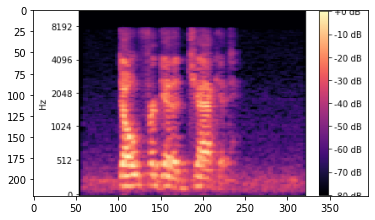

In [126]:
plt.imshow(im[21:241,:,:])

## Crop horizontally
Now do the same with a y coordinate. Just be careful with the legend on the right.

In [124]:
im2 = np.copy(im)
im2 = im2[225,:,:]

np.where(np.sum(im2==255, axis=1)==4)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333,
        334, 335, 336, 337, 350, 351, 352, 353, 354, 355, 356, 357, 358,
        359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371,
        372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384,
        385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395]),)

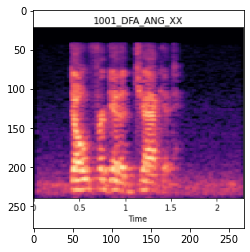

In [128]:
plt.imshow(im[:,54:323,:])

## Now all together
Put both limits together now

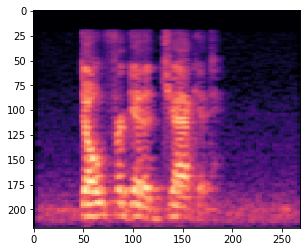

In [172]:
min_x = 54; max_x = 323
min_y = 22; max_y = 241
cropped_image = im[min_y:max_y, min_x:max_x, :]
# I know the index order looks weird in im[...], but that's how it works
# See the cropped images above

plt.imshow(cropped_image)
imageio.imsave('crop_test.png', cropped_image)

Test if the image was saved correctly

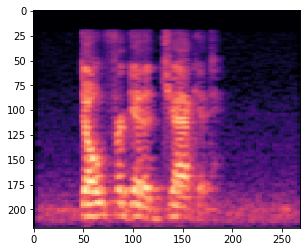

In [173]:
im_saved = imageio.imread('crop_test.png')
plt.imshow(im_saved)

## Crop all images
All images have the same size. I'll crop them with the limits found above and save them back to disk.

In [157]:
if '.DS_Store' in list_test:
    list_test.remove('.DS_Store')

print(list_test)

['ANG', 'DIS', 'FEA', 'HAP', 'NEU', 'SAD']


In [175]:
file_list = [os.path.join(dp, f) for dp, dn, fn in os.walk(os.path.expanduser("spectrograms_cnn_base/")) for f in fn]

count = 0
time_start = time.time()
for file in file_list:
    # Skip .DS_Store files
    if '.DS_Store' in file:
        continue
    
    # Load image
    im = imageio.imread(file)
    
    # Crop the image with the parameters we defined
    im_cropped = im[min_y:max_y, min_x:max_x, :]
    
    # Overwrite the original image
    imageio.imsave(file, im_cropped)
    print('Processed %s' %file)

time_end = time.time()
display_time(time_end-time_start)

Processed spectrograms_cnn_base/test/ANG/1006_DFA_ANG_XX.png
Processed spectrograms_cnn_base/test/ANG/1006_IOM_ANG_XX.png
Processed spectrograms_cnn_base/test/ANG/1006_ITH_ANG_XX.png
Processed spectrograms_cnn_base/test/ANG/1006_ITS_ANG_XX.png
Processed spectrograms_cnn_base/test/ANG/1006_IWL_ANG_XX.png
Processed spectrograms_cnn_base/test/ANG/1006_IWW_ANG_XX.png
Processed spectrograms_cnn_base/test/ANG/1006_MTI_ANG_XX.png
Processed spectrograms_cnn_base/test/ANG/1006_TAI_ANG_XX.png
Processed spectrograms_cnn_base/test/ANG/1006_TIE_ANG_XX.png
Processed spectrograms_cnn_base/test/ANG/1006_TSI_ANG_XX.png
Processed spectrograms_cnn_base/test/ANG/1006_WSI_ANG_XX.png
Processed spectrograms_cnn_base/test/ANG/1008_DFA_ANG_XX.png
Processed spectrograms_cnn_base/test/ANG/1008_IOM_ANG_XX.png
Processed spectrograms_cnn_base/test/ANG/1008_ITH_ANG_XX.png
Processed spectrograms_cnn_base/test/ANG/1008_ITS_ANG_XX.png
Processed spectrograms_cnn_base/test/ANG/1008_IWL_ANG_XX.png
Processed spectrograms_c

Processed spectrograms_cnn_base/test/ANG/1060_TAI_ANG_XX.png
Processed spectrograms_cnn_base/test/ANG/1060_TIE_ANG_XX.png
Processed spectrograms_cnn_base/test/ANG/1060_TSI_ANG_XX.png
Processed spectrograms_cnn_base/test/ANG/1060_WSI_ANG_XX.png
Processed spectrograms_cnn_base/test/ANG/1066_DFA_ANG_XX.png
Processed spectrograms_cnn_base/test/ANG/1066_IOM_ANG_XX.png
Processed spectrograms_cnn_base/test/ANG/1066_ITH_ANG_XX.png
Processed spectrograms_cnn_base/test/ANG/1066_ITS_ANG_XX.png
Processed spectrograms_cnn_base/test/ANG/1066_IWL_ANG_XX.png
Processed spectrograms_cnn_base/test/ANG/1066_IWW_ANG_XX.png
Processed spectrograms_cnn_base/test/ANG/1066_MTI_ANG_XX.png
Processed spectrograms_cnn_base/test/ANG/1066_TAI_ANG_XX.png
Processed spectrograms_cnn_base/test/ANG/1066_TIE_ANG_XX.png
Processed spectrograms_cnn_base/test/ANG/1066_TSI_ANG_XX.png
Processed spectrograms_cnn_base/test/ANG/1066_WSI_ANG_XX.png
Processed spectrograms_cnn_base/test/ANG/1068_DFA_ANG_XX.png
Processed spectrograms_c

Processed spectrograms_cnn_base/test/DIS/1039_DFA_DIS_XX.png
Processed spectrograms_cnn_base/test/DIS/1039_IOM_DIS_XX.png
Processed spectrograms_cnn_base/test/DIS/1039_ITH_DIS_XX.png
Processed spectrograms_cnn_base/test/DIS/1039_ITS_DIS_XX.png
Processed spectrograms_cnn_base/test/DIS/1039_IWL_DIS_XX.png
Processed spectrograms_cnn_base/test/DIS/1039_IWW_DIS_XX.png
Processed spectrograms_cnn_base/test/DIS/1039_MTI_DIS_XX.png
Processed spectrograms_cnn_base/test/DIS/1039_TAI_DIS_XX.png
Processed spectrograms_cnn_base/test/DIS/1039_TIE_DIS_XX.png
Processed spectrograms_cnn_base/test/DIS/1039_TSI_DIS_XX.png
Processed spectrograms_cnn_base/test/DIS/1039_WSI_DIS_XX.png
Processed spectrograms_cnn_base/test/DIS/1040_DFA_DIS_XX.png
Processed spectrograms_cnn_base/test/DIS/1040_IOM_DIS_XX.png
Processed spectrograms_cnn_base/test/DIS/1040_ITH_DIS_XX.png
Processed spectrograms_cnn_base/test/DIS/1040_ITS_DIS_XX.png
Processed spectrograms_cnn_base/test/DIS/1040_IWL_DIS_XX.png
Processed spectrograms_c

Processed spectrograms_cnn_base/test/FEA/1008_IWL_FEA_XX.png
Processed spectrograms_cnn_base/test/FEA/1008_IWW_FEA_XX.png
Processed spectrograms_cnn_base/test/FEA/1008_MTI_FEA_XX.png
Processed spectrograms_cnn_base/test/FEA/1008_TAI_FEA_XX.png
Processed spectrograms_cnn_base/test/FEA/1008_TIE_FEA_XX.png
Processed spectrograms_cnn_base/test/FEA/1008_TSI_FEA_XX.png
Processed spectrograms_cnn_base/test/FEA/1013_DFA_FEA_XX.png
Processed spectrograms_cnn_base/test/FEA/1013_IOM_FEA_XX.png
Processed spectrograms_cnn_base/test/FEA/1013_ITH_FEA_XX.png
Processed spectrograms_cnn_base/test/FEA/1013_ITS_FEA_XX.png
Processed spectrograms_cnn_base/test/FEA/1013_IWL_FEA_XX.png
Processed spectrograms_cnn_base/test/FEA/1013_IWW_FEA_XX.png
Processed spectrograms_cnn_base/test/FEA/1013_MTI_FEA_XX.png
Processed spectrograms_cnn_base/test/FEA/1013_TAI_FEA_XX.png
Processed spectrograms_cnn_base/test/FEA/1013_TIE_FEA_XX.png
Processed spectrograms_cnn_base/test/FEA/1013_TSI_FEA_XX.png
Processed spectrograms_c

Processed spectrograms_cnn_base/test/FEA/1068_DFA_FEA_XX.png
Processed spectrograms_cnn_base/test/FEA/1068_IOM_FEA_XX.png
Processed spectrograms_cnn_base/test/FEA/1068_ITH_FEA_XX.png
Processed spectrograms_cnn_base/test/FEA/1068_ITS_FEA_XX.png
Processed spectrograms_cnn_base/test/FEA/1068_IWL_FEA_XX.png
Processed spectrograms_cnn_base/test/FEA/1068_IWW_FEA_XX.png
Processed spectrograms_cnn_base/test/FEA/1068_MTI_FEA_XX.png
Processed spectrograms_cnn_base/test/FEA/1068_TAI_FEA_XX.png
Processed spectrograms_cnn_base/test/FEA/1068_TIE_FEA_XX.png
Processed spectrograms_cnn_base/test/FEA/1068_TSI_FEA_XX.png
Processed spectrograms_cnn_base/test/FEA/1068_WSI_FEA_XX.png
Processed spectrograms_cnn_base/test/FEA/1070_DFA_FEA_XX.png
Processed spectrograms_cnn_base/test/FEA/1070_IOM_FEA_XX.png
Processed spectrograms_cnn_base/test/FEA/1070_ITH_FEA_XX.png
Processed spectrograms_cnn_base/test/FEA/1070_ITS_FEA_XX.png
Processed spectrograms_cnn_base/test/FEA/1070_IWL_FEA_XX.png
Processed spectrograms_c

Processed spectrograms_cnn_base/test/HAP/1040_IWL_HAP_XX.png
Processed spectrograms_cnn_base/test/HAP/1040_IWW_HAP_XX.png
Processed spectrograms_cnn_base/test/HAP/1040_MTI_HAP_XX.png
Processed spectrograms_cnn_base/test/HAP/1040_TAI_HAP_XX.png
Processed spectrograms_cnn_base/test/HAP/1040_TIE_HAP_XX.png
Processed spectrograms_cnn_base/test/HAP/1040_TSI_HAP_XX.png
Processed spectrograms_cnn_base/test/HAP/1040_WSI_HAP_XX.png
Processed spectrograms_cnn_base/test/HAP/1043_DFA_HAP_XX.png
Processed spectrograms_cnn_base/test/HAP/1043_IOM_HAP_XX.png
Processed spectrograms_cnn_base/test/HAP/1043_ITH_HAP_XX.png
Processed spectrograms_cnn_base/test/HAP/1043_ITS_HAP_XX.png
Processed spectrograms_cnn_base/test/HAP/1043_IWL_HAP_XX.png
Processed spectrograms_cnn_base/test/HAP/1043_IWW_HAP_XX.png
Processed spectrograms_cnn_base/test/HAP/1043_MTI_HAP_XX.png
Processed spectrograms_cnn_base/test/HAP/1043_TAI_HAP_XX.png
Processed spectrograms_cnn_base/test/HAP/1043_TIE_HAP_XX.png
Processed spectrograms_c

Processed spectrograms_cnn_base/test/NEU/1013_IWW_NEU_XX.png
Processed spectrograms_cnn_base/test/NEU/1013_MTI_NEU_XX.png
Processed spectrograms_cnn_base/test/NEU/1013_TAI_NEU_XX.png
Processed spectrograms_cnn_base/test/NEU/1013_TIE_NEU_XX.png
Processed spectrograms_cnn_base/test/NEU/1013_TSI_NEU_XX.png
Processed spectrograms_cnn_base/test/NEU/1013_WSI_NEU_XX.png
Processed spectrograms_cnn_base/test/NEU/1028_DFA_NEU_XX.png
Processed spectrograms_cnn_base/test/NEU/1028_IEO_NEU_XX.png
Processed spectrograms_cnn_base/test/NEU/1028_IOM_NEU_XX.png
Processed spectrograms_cnn_base/test/NEU/1028_ITH_NEU_XX.png
Processed spectrograms_cnn_base/test/NEU/1028_ITS_NEU_XX.png
Processed spectrograms_cnn_base/test/NEU/1028_IWL_NEU_XX.png
Processed spectrograms_cnn_base/test/NEU/1028_IWW_NEU_XX.png
Processed spectrograms_cnn_base/test/NEU/1028_MTI_NEU_XX.png
Processed spectrograms_cnn_base/test/NEU/1028_TAI_NEU_XX.png
Processed spectrograms_cnn_base/test/NEU/1028_TIE_NEU_XX.png
Processed spectrograms_c

Processed spectrograms_cnn_base/test/NEU/1066_WSI_NEU_XX.png
Processed spectrograms_cnn_base/test/NEU/1068_DFA_NEU_XX.png
Processed spectrograms_cnn_base/test/NEU/1068_IEO_NEU_XX.png
Processed spectrograms_cnn_base/test/NEU/1068_IOM_NEU_XX.png
Processed spectrograms_cnn_base/test/NEU/1068_ITH_NEU_XX.png
Processed spectrograms_cnn_base/test/NEU/1068_ITS_NEU_XX.png
Processed spectrograms_cnn_base/test/NEU/1068_IWL_NEU_XX.png
Processed spectrograms_cnn_base/test/NEU/1068_IWW_NEU_XX.png
Processed spectrograms_cnn_base/test/NEU/1068_MTI_NEU_XX.png
Processed spectrograms_cnn_base/test/NEU/1068_TAI_NEU_XX.png
Processed spectrograms_cnn_base/test/NEU/1068_TIE_NEU_XX.png
Processed spectrograms_cnn_base/test/NEU/1068_TSI_NEU_XX.png
Processed spectrograms_cnn_base/test/NEU/1068_WSI_NEU_XX.png
Processed spectrograms_cnn_base/test/NEU/1070_DFA_NEU_XX.png
Processed spectrograms_cnn_base/test/NEU/1070_IEO_NEU_XX.png
Processed spectrograms_cnn_base/test/NEU/1070_IOM_NEU_XX.png
Processed spectrograms_c

Processed spectrograms_cnn_base/test/SAD/1040_IOM_SAD_XX.png
Processed spectrograms_cnn_base/test/SAD/1040_ITH_SAD_XX.png
Processed spectrograms_cnn_base/test/SAD/1040_ITS_SAD_XX.png
Processed spectrograms_cnn_base/test/SAD/1040_IWL_SAD_XX.png
Processed spectrograms_cnn_base/test/SAD/1040_IWW_SAD_XX.png
Processed spectrograms_cnn_base/test/SAD/1040_MTI_SAD_XX.png
Processed spectrograms_cnn_base/test/SAD/1040_TAI_SAD_XX.png
Processed spectrograms_cnn_base/test/SAD/1040_TIE_SAD_XX.png
Processed spectrograms_cnn_base/test/SAD/1040_TSI_SAD_XX.png
Processed spectrograms_cnn_base/test/SAD/1040_WSI_SAD_XX.png
Processed spectrograms_cnn_base/test/SAD/1043_DFA_SAD_XX.png
Processed spectrograms_cnn_base/test/SAD/1043_IOM_SAD_XX.png
Processed spectrograms_cnn_base/test/SAD/1043_ITH_SAD_XX.png
Processed spectrograms_cnn_base/test/SAD/1043_ITS_SAD_XX.png
Processed spectrograms_cnn_base/test/SAD/1043_IWL_SAD_XX.png
Processed spectrograms_cnn_base/test/SAD/1043_IWW_SAD_XX.png
Processed spectrograms_c

Processed spectrograms_cnn_base/train/ANG/1004_IOM_ANG_XX.png
Processed spectrograms_cnn_base/train/ANG/1004_ITH_ANG_XX.png
Processed spectrograms_cnn_base/train/ANG/1004_ITS_ANG_XX.png
Processed spectrograms_cnn_base/train/ANG/1004_IWL_ANG_XX.png
Processed spectrograms_cnn_base/train/ANG/1004_IWW_ANG_XX.png
Processed spectrograms_cnn_base/train/ANG/1004_TAI_ANG_XX.png
Processed spectrograms_cnn_base/train/ANG/1004_TIE_ANG_XX.png
Processed spectrograms_cnn_base/train/ANG/1004_TSI_ANG_XX.png
Processed spectrograms_cnn_base/train/ANG/1004_WSI_ANG_XX.png
Processed spectrograms_cnn_base/train/ANG/1005_DFA_ANG_XX.png
Processed spectrograms_cnn_base/train/ANG/1005_IOM_ANG_XX.png
Processed spectrograms_cnn_base/train/ANG/1005_IWL_ANG_XX.png
Processed spectrograms_cnn_base/train/ANG/1005_IWW_ANG_XX.png
Processed spectrograms_cnn_base/train/ANG/1005_MTI_ANG_XX.png
Processed spectrograms_cnn_base/train/ANG/1005_TIE_ANG_XX.png
Processed spectrograms_cnn_base/train/ANG/1005_TSI_ANG_XX.png
Processe

Processed spectrograms_cnn_base/train/ANG/1023_DFA_ANG_XX.png
Processed spectrograms_cnn_base/train/ANG/1023_ITH_ANG_XX.png
Processed spectrograms_cnn_base/train/ANG/1023_ITS_ANG_XX.png
Processed spectrograms_cnn_base/train/ANG/1023_IWL_ANG_XX.png
Processed spectrograms_cnn_base/train/ANG/1023_IWW_ANG_XX.png
Processed spectrograms_cnn_base/train/ANG/1023_TIE_ANG_XX.png
Processed spectrograms_cnn_base/train/ANG/1023_TSI_ANG_XX.png
Processed spectrograms_cnn_base/train/ANG/1023_WSI_ANG_XX.png
Processed spectrograms_cnn_base/train/ANG/1024_DFA_ANG_XX.png
Processed spectrograms_cnn_base/train/ANG/1024_IOM_ANG_XX.png
Processed spectrograms_cnn_base/train/ANG/1024_ITH_ANG_XX.png
Processed spectrograms_cnn_base/train/ANG/1024_ITS_ANG_XX.png
Processed spectrograms_cnn_base/train/ANG/1024_IWW_ANG_XX.png
Processed spectrograms_cnn_base/train/ANG/1024_TAI_ANG_XX.png
Processed spectrograms_cnn_base/train/ANG/1024_TIE_ANG_XX.png
Processed spectrograms_cnn_base/train/ANG/1024_TSI_ANG_XX.png
Processe

Processed spectrograms_cnn_base/train/ANG/1045_ITS_ANG_XX.png
Processed spectrograms_cnn_base/train/ANG/1045_IWL_ANG_XX.png
Processed spectrograms_cnn_base/train/ANG/1045_MTI_ANG_XX.png
Processed spectrograms_cnn_base/train/ANG/1045_TAI_ANG_XX.png
Processed spectrograms_cnn_base/train/ANG/1045_TSI_ANG_XX.png
Processed spectrograms_cnn_base/train/ANG/1045_WSI_ANG_XX.png
Processed spectrograms_cnn_base/train/ANG/1046_DFA_ANG_XX.png
Processed spectrograms_cnn_base/train/ANG/1046_IOM_ANG_XX.png
Processed spectrograms_cnn_base/train/ANG/1046_ITS_ANG_XX.png
Processed spectrograms_cnn_base/train/ANG/1046_IWL_ANG_XX.png
Processed spectrograms_cnn_base/train/ANG/1046_IWW_ANG_XX.png
Processed spectrograms_cnn_base/train/ANG/1046_MTI_ANG_XX.png
Processed spectrograms_cnn_base/train/ANG/1046_TIE_ANG_XX.png
Processed spectrograms_cnn_base/train/ANG/1046_TSI_ANG_XX.png
Processed spectrograms_cnn_base/train/ANG/1046_WSI_ANG_XX.png
Processed spectrograms_cnn_base/train/ANG/1047_IOM_ANG_XX.png
Processe

Processed spectrograms_cnn_base/train/ANG/1064_ITS_ANG_XX.png
Processed spectrograms_cnn_base/train/ANG/1064_IWW_ANG_XX.png
Processed spectrograms_cnn_base/train/ANG/1064_MTI_ANG_XX.png
Processed spectrograms_cnn_base/train/ANG/1064_TIE_ANG_XX.png
Processed spectrograms_cnn_base/train/ANG/1064_TSI_ANG_XX.png
Processed spectrograms_cnn_base/train/ANG/1064_WSI_ANG_XX.png
Processed spectrograms_cnn_base/train/ANG/1065_IOM_ANG_XX.png
Processed spectrograms_cnn_base/train/ANG/1065_ITH_ANG_XX.png
Processed spectrograms_cnn_base/train/ANG/1065_ITS_ANG_XX.png
Processed spectrograms_cnn_base/train/ANG/1065_IWL_ANG_XX.png
Processed spectrograms_cnn_base/train/ANG/1065_IWW_ANG_XX.png
Processed spectrograms_cnn_base/train/ANG/1065_MTI_ANG_XX.png
Processed spectrograms_cnn_base/train/ANG/1065_TAI_ANG_XX.png
Processed spectrograms_cnn_base/train/ANG/1065_TIE_ANG_XX.png
Processed spectrograms_cnn_base/train/ANG/1065_TSI_ANG_XX.png
Processed spectrograms_cnn_base/train/ANG/1067_DFA_ANG_XX.png
Processe

Processed spectrograms_cnn_base/train/ANG/1082_WSI_ANG_XX.png
Processed spectrograms_cnn_base/train/ANG/1083_DFA_ANG_XX.png
Processed spectrograms_cnn_base/train/ANG/1083_IOM_ANG_XX.png
Processed spectrograms_cnn_base/train/ANG/1083_ITH_ANG_XX.png
Processed spectrograms_cnn_base/train/ANG/1083_ITS_ANG_XX.png
Processed spectrograms_cnn_base/train/ANG/1083_IWW_ANG_XX.png
Processed spectrograms_cnn_base/train/ANG/1083_MTI_ANG_XX.png
Processed spectrograms_cnn_base/train/ANG/1083_TIE_ANG_XX.png
Processed spectrograms_cnn_base/train/ANG/1083_TSI_ANG_XX.png
Processed spectrograms_cnn_base/train/ANG/1083_WSI_ANG_XX.png
Processed spectrograms_cnn_base/train/ANG/1084_DFA_ANG_XX.png
Processed spectrograms_cnn_base/train/ANG/1084_IOM_ANG_XX.png
Processed spectrograms_cnn_base/train/ANG/1084_ITH_ANG_XX.png
Processed spectrograms_cnn_base/train/ANG/1084_ITS_ANG_XX.png
Processed spectrograms_cnn_base/train/ANG/1084_IWL_ANG_XX.png
Processed spectrograms_cnn_base/train/ANG/1084_IWW_ANG_XX.png
Processe

Processed spectrograms_cnn_base/train/DIS/1009_WSI_DIS_XX.png
Processed spectrograms_cnn_base/train/DIS/1010_DFA_DIS_XX.png
Processed spectrograms_cnn_base/train/DIS/1010_IOM_DIS_XX.png
Processed spectrograms_cnn_base/train/DIS/1010_ITH_DIS_XX.png
Processed spectrograms_cnn_base/train/DIS/1010_ITS_DIS_XX.png
Processed spectrograms_cnn_base/train/DIS/1010_IWW_DIS_XX.png
Processed spectrograms_cnn_base/train/DIS/1010_MTI_DIS_XX.png
Processed spectrograms_cnn_base/train/DIS/1010_TAI_DIS_XX.png
Processed spectrograms_cnn_base/train/DIS/1010_TIE_DIS_XX.png
Processed spectrograms_cnn_base/train/DIS/1010_TSI_DIS_XX.png
Processed spectrograms_cnn_base/train/DIS/1010_WSI_DIS_XX.png
Processed spectrograms_cnn_base/train/DIS/1011_IOM_DIS_XX.png
Processed spectrograms_cnn_base/train/DIS/1011_ITH_DIS_XX.png
Processed spectrograms_cnn_base/train/DIS/1011_IWL_DIS_XX.png
Processed spectrograms_cnn_base/train/DIS/1011_MTI_DIS_XX.png
Processed spectrograms_cnn_base/train/DIS/1011_TAI_DIS_XX.png
Processe

Processed spectrograms_cnn_base/train/DIS/1026_IOM_DIS_XX.png
Processed spectrograms_cnn_base/train/DIS/1026_ITH_DIS_XX.png
Processed spectrograms_cnn_base/train/DIS/1026_IWW_DIS_XX.png
Processed spectrograms_cnn_base/train/DIS/1026_MTI_DIS_XX.png
Processed spectrograms_cnn_base/train/DIS/1026_TAI_DIS_XX.png
Processed spectrograms_cnn_base/train/DIS/1026_TIE_DIS_XX.png
Processed spectrograms_cnn_base/train/DIS/1026_TSI_DIS_XX.png
Processed spectrograms_cnn_base/train/DIS/1026_WSI_DIS_XX.png
Processed spectrograms_cnn_base/train/DIS/1027_DFA_DIS_XX.png
Processed spectrograms_cnn_base/train/DIS/1027_IOM_DIS_XX.png
Processed spectrograms_cnn_base/train/DIS/1027_ITH_DIS_XX.png
Processed spectrograms_cnn_base/train/DIS/1027_ITS_DIS_XX.png
Processed spectrograms_cnn_base/train/DIS/1027_IWL_DIS_XX.png
Processed spectrograms_cnn_base/train/DIS/1027_IWW_DIS_XX.png
Processed spectrograms_cnn_base/train/DIS/1027_MTI_DIS_XX.png
Processed spectrograms_cnn_base/train/DIS/1027_TAI_DIS_XX.png
Processe

Processed spectrograms_cnn_base/train/DIS/1048_ITH_DIS_XX.png
Processed spectrograms_cnn_base/train/DIS/1048_ITS_DIS_XX.png
Processed spectrograms_cnn_base/train/DIS/1048_IWL_DIS_XX.png
Processed spectrograms_cnn_base/train/DIS/1048_IWW_DIS_XX.png
Processed spectrograms_cnn_base/train/DIS/1048_TAI_DIS_XX.png
Processed spectrograms_cnn_base/train/DIS/1048_TIE_DIS_XX.png
Processed spectrograms_cnn_base/train/DIS/1048_WSI_DIS_XX.png
Processed spectrograms_cnn_base/train/DIS/1050_DFA_DIS_XX.png
Processed spectrograms_cnn_base/train/DIS/1050_IOM_DIS_XX.png
Processed spectrograms_cnn_base/train/DIS/1050_IWW_DIS_XX.png
Processed spectrograms_cnn_base/train/DIS/1050_MTI_DIS_XX.png
Processed spectrograms_cnn_base/train/DIS/1050_TAI_DIS_XX.png
Processed spectrograms_cnn_base/train/DIS/1050_TIE_DIS_XX.png
Processed spectrograms_cnn_base/train/DIS/1050_WSI_DIS_XX.png
Processed spectrograms_cnn_base/train/DIS/1052_DFA_DIS_XX.png
Processed spectrograms_cnn_base/train/DIS/1052_IOM_DIS_XX.png
Processe

Processed spectrograms_cnn_base/train/DIS/1067_WSI_DIS_XX.png
Processed spectrograms_cnn_base/train/DIS/1069_DFA_DIS_XX.png
Processed spectrograms_cnn_base/train/DIS/1069_IOM_DIS_XX.png
Processed spectrograms_cnn_base/train/DIS/1069_ITH_DIS_XX.png
Processed spectrograms_cnn_base/train/DIS/1069_ITS_DIS_XX.png
Processed spectrograms_cnn_base/train/DIS/1069_IWL_DIS_XX.png
Processed spectrograms_cnn_base/train/DIS/1069_IWW_DIS_XX.png
Processed spectrograms_cnn_base/train/DIS/1069_MTI_DIS_XX.png
Processed spectrograms_cnn_base/train/DIS/1069_TAI_DIS_XX.png
Processed spectrograms_cnn_base/train/DIS/1069_TIE_DIS_XX.png
Processed spectrograms_cnn_base/train/DIS/1069_TSI_DIS_XX.png
Processed spectrograms_cnn_base/train/DIS/1069_WSI_DIS_XX.png
Processed spectrograms_cnn_base/train/DIS/1071_IOM_DIS_XX.png
Processed spectrograms_cnn_base/train/DIS/1071_ITH_DIS_XX.png
Processed spectrograms_cnn_base/train/DIS/1071_ITS_DIS_XX.png
Processed spectrograms_cnn_base/train/DIS/1071_IWL_DIS_XX.png
Processe

Processed spectrograms_cnn_base/train/DIS/1085_TIE_DIS_XX.png
Processed spectrograms_cnn_base/train/DIS/1085_TSI_DIS_XX.png
Processed spectrograms_cnn_base/train/DIS/1085_WSI_DIS_XX.png
Processed spectrograms_cnn_base/train/DIS/1086_DFA_DIS_XX.png
Processed spectrograms_cnn_base/train/DIS/1086_IOM_DIS_XX.png
Processed spectrograms_cnn_base/train/DIS/1086_ITH_DIS_XX.png
Processed spectrograms_cnn_base/train/DIS/1086_IWL_DIS_XX.png
Processed spectrograms_cnn_base/train/DIS/1086_IWW_DIS_XX.png
Processed spectrograms_cnn_base/train/DIS/1086_MTI_DIS_XX.png
Processed spectrograms_cnn_base/train/DIS/1086_TIE_DIS_XX.png
Processed spectrograms_cnn_base/train/DIS/1086_WSI_DIS_XX.png
Processed spectrograms_cnn_base/train/DIS/1087_DFA_DIS_XX.png
Processed spectrograms_cnn_base/train/DIS/1087_ITH_DIS_XX.png
Processed spectrograms_cnn_base/train/DIS/1087_ITS_DIS_XX.png
Processed spectrograms_cnn_base/train/DIS/1087_IWL_DIS_XX.png
Processed spectrograms_cnn_base/train/DIS/1087_IWW_DIS_XX.png
Processe

Processed spectrograms_cnn_base/train/FEA/1015_ITH_FEA_XX.png
Processed spectrograms_cnn_base/train/FEA/1015_ITS_FEA_XX.png
Processed spectrograms_cnn_base/train/FEA/1015_IWL_FEA_XX.png
Processed spectrograms_cnn_base/train/FEA/1015_MTI_FEA_XX.png
Processed spectrograms_cnn_base/train/FEA/1015_TAI_FEA_XX.png
Processed spectrograms_cnn_base/train/FEA/1015_TIE_FEA_XX.png
Processed spectrograms_cnn_base/train/FEA/1015_TSI_FEA_XX.png
Processed spectrograms_cnn_base/train/FEA/1016_IOM_FEA_XX.png
Processed spectrograms_cnn_base/train/FEA/1016_ITH_FEA_XX.png
Processed spectrograms_cnn_base/train/FEA/1016_IWL_FEA_XX.png
Processed spectrograms_cnn_base/train/FEA/1016_MTI_FEA_XX.png
Processed spectrograms_cnn_base/train/FEA/1016_TAI_FEA_XX.png
Processed spectrograms_cnn_base/train/FEA/1016_TIE_FEA_XX.png
Processed spectrograms_cnn_base/train/FEA/1016_TSI_FEA_XX.png
Processed spectrograms_cnn_base/train/FEA/1016_WSI_FEA_XX.png
Processed spectrograms_cnn_base/train/FEA/1017_DFA_FEA_XX.png
Processe

Processed spectrograms_cnn_base/train/FEA/1033_TSI_FEA_XX.png
Processed spectrograms_cnn_base/train/FEA/1033_WSI_FEA_XX.png
Processed spectrograms_cnn_base/train/FEA/1035_ITH_FEA_XX.png
Processed spectrograms_cnn_base/train/FEA/1035_IWL_FEA_XX.png
Processed spectrograms_cnn_base/train/FEA/1035_IWW_FEA_XX.png
Processed spectrograms_cnn_base/train/FEA/1035_TAI_FEA_XX.png
Processed spectrograms_cnn_base/train/FEA/1035_TIE_FEA_XX.png
Processed spectrograms_cnn_base/train/FEA/1035_TSI_FEA_XX.png
Processed spectrograms_cnn_base/train/FEA/1035_WSI_FEA_XX.png
Processed spectrograms_cnn_base/train/FEA/1036_IOM_FEA_XX.png
Processed spectrograms_cnn_base/train/FEA/1036_ITH_FEA_XX.png
Processed spectrograms_cnn_base/train/FEA/1036_IWL_FEA_XX.png
Processed spectrograms_cnn_base/train/FEA/1036_TAI_FEA_XX.png
Processed spectrograms_cnn_base/train/FEA/1036_TIE_FEA_XX.png
Processed spectrograms_cnn_base/train/FEA/1036_TSI_FEA_XX.png
Processed spectrograms_cnn_base/train/FEA/1036_WSI_FEA_XX.png
Processe

Processed spectrograms_cnn_base/train/FEA/1055_DFA_FEA_XX.png
Processed spectrograms_cnn_base/train/FEA/1055_ITS_FEA_XX.png
Processed spectrograms_cnn_base/train/FEA/1055_IWL_FEA_XX.png
Processed spectrograms_cnn_base/train/FEA/1055_IWW_FEA_XX.png
Processed spectrograms_cnn_base/train/FEA/1055_MTI_FEA_XX.png
Processed spectrograms_cnn_base/train/FEA/1055_TAI_FEA_XX.png
Processed spectrograms_cnn_base/train/FEA/1056_IOM_FEA_XX.png
Processed spectrograms_cnn_base/train/FEA/1056_ITH_FEA_XX.png
Processed spectrograms_cnn_base/train/FEA/1056_ITS_FEA_XX.png
Processed spectrograms_cnn_base/train/FEA/1056_IWL_FEA_XX.png
Processed spectrograms_cnn_base/train/FEA/1056_IWW_FEA_XX.png
Processed spectrograms_cnn_base/train/FEA/1056_MTI_FEA_XX.png
Processed spectrograms_cnn_base/train/FEA/1056_TIE_FEA_XX.png
Processed spectrograms_cnn_base/train/FEA/1056_TSI_FEA_XX.png
Processed spectrograms_cnn_base/train/FEA/1057_IOM_FEA_XX.png
Processed spectrograms_cnn_base/train/FEA/1057_ITH_FEA_XX.png
Processe

Processed spectrograms_cnn_base/train/FEA/1074_TIE_FEA_XX.png
Processed spectrograms_cnn_base/train/FEA/1074_WSI_FEA_XX.png
Processed spectrograms_cnn_base/train/FEA/1075_DFA_FEA_XX.png
Processed spectrograms_cnn_base/train/FEA/1075_IOM_FEA_XX.png
Processed spectrograms_cnn_base/train/FEA/1075_ITH_FEA_XX.png
Processed spectrograms_cnn_base/train/FEA/1075_ITS_FEA_XX.png
Processed spectrograms_cnn_base/train/FEA/1075_IWL_FEA_XX.png
Processed spectrograms_cnn_base/train/FEA/1075_IWW_FEA_XX.png
Processed spectrograms_cnn_base/train/FEA/1075_MTI_FEA_XX.png
Processed spectrograms_cnn_base/train/FEA/1075_TAI_FEA_XX.png
Processed spectrograms_cnn_base/train/FEA/1075_TIE_FEA_XX.png
Processed spectrograms_cnn_base/train/FEA/1075_TSI_FEA_XX.png
Processed spectrograms_cnn_base/train/FEA/1075_WSI_FEA_XX.png
Processed spectrograms_cnn_base/train/FEA/1076_DFA_FEA_XX.png
Processed spectrograms_cnn_base/train/FEA/1076_IOM_FEA_XX.png
Processed spectrograms_cnn_base/train/FEA/1076_ITH_FEA_XX.png
Processe

Processed spectrograms_cnn_base/train/FEA/1091_TAI_FEA_XX.png
Processed spectrograms_cnn_base/train/FEA/1091_TIE_FEA_XX.png
Processed spectrograms_cnn_base/train/FEA/1091_TSI_FEA_XX.png
Processed spectrograms_cnn_base/train/FEA/1091_WSI_FEA_XX.png
Processed spectrograms_cnn_base/train/HAP/1001_DFA_HAP_XX.png
Processed spectrograms_cnn_base/train/HAP/1001_ITH_HAP_XX.png
Processed spectrograms_cnn_base/train/HAP/1001_ITS_HAP_XX.png
Processed spectrograms_cnn_base/train/HAP/1001_IWL_HAP_XX.png
Processed spectrograms_cnn_base/train/HAP/1001_IWW_HAP_XX.png
Processed spectrograms_cnn_base/train/HAP/1001_MTI_HAP_XX.png
Processed spectrograms_cnn_base/train/HAP/1001_TAI_HAP_XX.png
Processed spectrograms_cnn_base/train/HAP/1001_TIE_HAP_XX.png
Processed spectrograms_cnn_base/train/HAP/1001_TSI_HAP_XX.png
Processed spectrograms_cnn_base/train/HAP/1001_WSI_HAP_XX.png
Processed spectrograms_cnn_base/train/HAP/1002_DFA_HAP_XX.png
Processed spectrograms_cnn_base/train/HAP/1002_IOM_HAP_XX.png
Processe

Processed spectrograms_cnn_base/train/HAP/1018_MTI_HAP_XX.png
Processed spectrograms_cnn_base/train/HAP/1018_TAI_HAP_XX.png
Processed spectrograms_cnn_base/train/HAP/1018_TIE_HAP_XX.png
Processed spectrograms_cnn_base/train/HAP/1018_TSI_HAP_XX.png
Processed spectrograms_cnn_base/train/HAP/1018_WSI_HAP_XX.png
Processed spectrograms_cnn_base/train/HAP/1019_IOM_HAP_XX.png
Processed spectrograms_cnn_base/train/HAP/1019_ITS_HAP_XX.png
Processed spectrograms_cnn_base/train/HAP/1019_IWW_HAP_XX.png
Processed spectrograms_cnn_base/train/HAP/1019_MTI_HAP_XX.png
Processed spectrograms_cnn_base/train/HAP/1019_TSI_HAP_XX.png
Processed spectrograms_cnn_base/train/HAP/1019_WSI_HAP_XX.png
Processed spectrograms_cnn_base/train/HAP/1020_DFA_HAP_XX.png
Processed spectrograms_cnn_base/train/HAP/1020_IOM_HAP_XX.png
Processed spectrograms_cnn_base/train/HAP/1020_ITS_HAP_XX.png
Processed spectrograms_cnn_base/train/HAP/1020_IWW_HAP_XX.png
Processed spectrograms_cnn_base/train/HAP/1020_MTI_HAP_XX.png
Processe

Processed spectrograms_cnn_base/train/HAP/1038_DFA_HAP_XX.png
Processed spectrograms_cnn_base/train/HAP/1038_IOM_HAP_XX.png
Processed spectrograms_cnn_base/train/HAP/1038_ITS_HAP_XX.png
Processed spectrograms_cnn_base/train/HAP/1038_IWL_HAP_XX.png
Processed spectrograms_cnn_base/train/HAP/1038_IWW_HAP_XX.png
Processed spectrograms_cnn_base/train/HAP/1038_MTI_HAP_XX.png
Processed spectrograms_cnn_base/train/HAP/1038_TAI_HAP_XX.png
Processed spectrograms_cnn_base/train/HAP/1038_TIE_HAP_XX.png
Processed spectrograms_cnn_base/train/HAP/1038_TSI_HAP_XX.png
Processed spectrograms_cnn_base/train/HAP/1041_DFA_HAP_XX.png
Processed spectrograms_cnn_base/train/HAP/1041_IOM_HAP_XX.png
Processed spectrograms_cnn_base/train/HAP/1041_ITH_HAP_XX.png
Processed spectrograms_cnn_base/train/HAP/1041_ITS_HAP_XX.png
Processed spectrograms_cnn_base/train/HAP/1041_IWL_HAP_XX.png
Processed spectrograms_cnn_base/train/HAP/1041_IWW_HAP_XX.png
Processed spectrograms_cnn_base/train/HAP/1041_MTI_HAP_XX.png
Processe

Processed spectrograms_cnn_base/train/HAP/1057_IWL_HAP_XX.png
Processed spectrograms_cnn_base/train/HAP/1057_IWW_HAP_XX.png
Processed spectrograms_cnn_base/train/HAP/1057_TAI_HAP_XX.png
Processed spectrograms_cnn_base/train/HAP/1057_TSI_HAP_XX.png
Processed spectrograms_cnn_base/train/HAP/1057_WSI_HAP_XX.png
Processed spectrograms_cnn_base/train/HAP/1058_DFA_HAP_XX.png
Processed spectrograms_cnn_base/train/HAP/1058_IOM_HAP_XX.png
Processed spectrograms_cnn_base/train/HAP/1058_ITS_HAP_XX.png
Processed spectrograms_cnn_base/train/HAP/1058_IWL_HAP_XX.png
Processed spectrograms_cnn_base/train/HAP/1058_IWW_HAP_XX.png
Processed spectrograms_cnn_base/train/HAP/1058_MTI_HAP_XX.png
Processed spectrograms_cnn_base/train/HAP/1058_TAI_HAP_XX.png
Processed spectrograms_cnn_base/train/HAP/1058_TIE_HAP_XX.png
Processed spectrograms_cnn_base/train/HAP/1058_TSI_HAP_XX.png
Processed spectrograms_cnn_base/train/HAP/1058_WSI_HAP_XX.png
Processed spectrograms_cnn_base/train/HAP/1059_IOM_HAP_XX.png
Processe

Processed spectrograms_cnn_base/train/HAP/1077_IWW_HAP_XX.png
Processed spectrograms_cnn_base/train/HAP/1077_MTI_HAP_XX.png
Processed spectrograms_cnn_base/train/HAP/1077_TSI_HAP_XX.png
Processed spectrograms_cnn_base/train/HAP/1077_WSI_HAP_XX.png
Processed spectrograms_cnn_base/train/HAP/1078_DFA_HAP_XX.png
Processed spectrograms_cnn_base/train/HAP/1078_IOM_HAP_XX.png
Processed spectrograms_cnn_base/train/HAP/1078_ITH_HAP_XX.png
Processed spectrograms_cnn_base/train/HAP/1078_ITS_HAP_XX.png
Processed spectrograms_cnn_base/train/HAP/1078_IWW_HAP_XX.png
Processed spectrograms_cnn_base/train/HAP/1078_WSI_HAP_XX.png
Processed spectrograms_cnn_base/train/HAP/1079_DFA_HAP_XX.png
Processed spectrograms_cnn_base/train/HAP/1079_IOM_HAP_XX.png
Processed spectrograms_cnn_base/train/HAP/1079_ITH_HAP_XX.png
Processed spectrograms_cnn_base/train/HAP/1079_IWL_HAP_XX.png
Processed spectrograms_cnn_base/train/HAP/1079_MTI_HAP_XX.png
Processed spectrograms_cnn_base/train/HAP/1079_TAI_HAP_XX.png
Processe

Processed spectrograms_cnn_base/train/NEU/1003_TIE_NEU_XX.png
Processed spectrograms_cnn_base/train/NEU/1003_TSI_NEU_XX.png
Processed spectrograms_cnn_base/train/NEU/1003_WSI_NEU_XX.png
Processed spectrograms_cnn_base/train/NEU/1004_DFA_NEU_XX.png
Processed spectrograms_cnn_base/train/NEU/1004_IOM_NEU_XX.png
Processed spectrograms_cnn_base/train/NEU/1004_ITS_NEU_XX.png
Processed spectrograms_cnn_base/train/NEU/1004_IWL_NEU_XX.png
Processed spectrograms_cnn_base/train/NEU/1004_IWW_NEU_XX.png
Processed spectrograms_cnn_base/train/NEU/1004_MTI_NEU_XX.png
Processed spectrograms_cnn_base/train/NEU/1004_TAI_NEU_XX.png
Processed spectrograms_cnn_base/train/NEU/1004_TIE_NEU_XX.png
Processed spectrograms_cnn_base/train/NEU/1004_WSI_NEU_XX.png
Processed spectrograms_cnn_base/train/NEU/1005_DFA_NEU_XX.png
Processed spectrograms_cnn_base/train/NEU/1005_IOM_NEU_XX.png
Processed spectrograms_cnn_base/train/NEU/1005_ITH_NEU_XX.png
Processed spectrograms_cnn_base/train/NEU/1005_ITS_NEU_XX.png
Processe

Processed spectrograms_cnn_base/train/NEU/1020_TSI_NEU_XX.png
Processed spectrograms_cnn_base/train/NEU/1021_DFA_NEU_XX.png
Processed spectrograms_cnn_base/train/NEU/1021_IEO_NEU_XX.png
Processed spectrograms_cnn_base/train/NEU/1021_ITH_NEU_XX.png
Processed spectrograms_cnn_base/train/NEU/1021_ITS_NEU_XX.png
Processed spectrograms_cnn_base/train/NEU/1021_IWL_NEU_XX.png
Processed spectrograms_cnn_base/train/NEU/1021_IWW_NEU_XX.png
Processed spectrograms_cnn_base/train/NEU/1021_MTI_NEU_XX.png
Processed spectrograms_cnn_base/train/NEU/1021_TIE_NEU_XX.png
Processed spectrograms_cnn_base/train/NEU/1021_TSI_NEU_XX.png
Processed spectrograms_cnn_base/train/NEU/1021_WSI_NEU_XX.png
Processed spectrograms_cnn_base/train/NEU/1022_DFA_NEU_XX.png
Processed spectrograms_cnn_base/train/NEU/1022_IOM_NEU_XX.png
Processed spectrograms_cnn_base/train/NEU/1022_ITS_NEU_XX.png
Processed spectrograms_cnn_base/train/NEU/1022_IWL_NEU_XX.png
Processed spectrograms_cnn_base/train/NEU/1022_IWW_NEU_XX.png
Processe

Processed spectrograms_cnn_base/train/NEU/1038_TAI_NEU_XX.png
Processed spectrograms_cnn_base/train/NEU/1038_TSI_NEU_XX.png
Processed spectrograms_cnn_base/train/NEU/1038_WSI_NEU_XX.png
Processed spectrograms_cnn_base/train/NEU/1041_IEO_NEU_XX.png
Processed spectrograms_cnn_base/train/NEU/1041_ITS_NEU_XX.png
Processed spectrograms_cnn_base/train/NEU/1041_IWL_NEU_XX.png
Processed spectrograms_cnn_base/train/NEU/1041_TAI_NEU_XX.png
Processed spectrograms_cnn_base/train/NEU/1041_WSI_NEU_XX.png
Processed spectrograms_cnn_base/train/NEU/1042_DFA_NEU_XX.png
Processed spectrograms_cnn_base/train/NEU/1042_IEO_NEU_XX.png
Processed spectrograms_cnn_base/train/NEU/1042_IOM_NEU_XX.png
Processed spectrograms_cnn_base/train/NEU/1042_ITH_NEU_XX.png
Processed spectrograms_cnn_base/train/NEU/1042_ITS_NEU_XX.png
Processed spectrograms_cnn_base/train/NEU/1042_IWL_NEU_XX.png
Processed spectrograms_cnn_base/train/NEU/1042_IWW_NEU_XX.png
Processed spectrograms_cnn_base/train/NEU/1042_MTI_NEU_XX.png
Processe

Processed spectrograms_cnn_base/train/NEU/1058_IEO_NEU_XX.png
Processed spectrograms_cnn_base/train/NEU/1058_IOM_NEU_XX.png
Processed spectrograms_cnn_base/train/NEU/1058_ITH_NEU_XX.png
Processed spectrograms_cnn_base/train/NEU/1058_ITS_NEU_XX.png
Processed spectrograms_cnn_base/train/NEU/1058_IWW_NEU_XX.png
Processed spectrograms_cnn_base/train/NEU/1058_MTI_NEU_XX.png
Processed spectrograms_cnn_base/train/NEU/1058_TAI_NEU_XX.png
Processed spectrograms_cnn_base/train/NEU/1058_TIE_NEU_XX.png
Processed spectrograms_cnn_base/train/NEU/1058_TSI_NEU_XX.png
Processed spectrograms_cnn_base/train/NEU/1058_WSI_NEU_XX.png
Processed spectrograms_cnn_base/train/NEU/1059_DFA_NEU_XX.png
Processed spectrograms_cnn_base/train/NEU/1059_IEO_NEU_XX.png
Processed spectrograms_cnn_base/train/NEU/1059_ITH_NEU_XX.png
Processed spectrograms_cnn_base/train/NEU/1059_ITS_NEU_XX.png
Processed spectrograms_cnn_base/train/NEU/1059_IWL_NEU_XX.png
Processed spectrograms_cnn_base/train/NEU/1059_IWW_NEU_XX.png
Processe

Processed spectrograms_cnn_base/train/NEU/1075_MTI_NEU_XX.png
Processed spectrograms_cnn_base/train/NEU/1075_TAI_NEU_XX.png
Processed spectrograms_cnn_base/train/NEU/1075_TIE_NEU_XX.png
Processed spectrograms_cnn_base/train/NEU/1076_DFA_NEU_XX.png
Processed spectrograms_cnn_base/train/NEU/1076_IOM_NEU_XX.png
Processed spectrograms_cnn_base/train/NEU/1076_ITH_NEU_XX.png
Processed spectrograms_cnn_base/train/NEU/1076_IWL_NEU_XX.png
Processed spectrograms_cnn_base/train/NEU/1076_IWW_NEU_XX.png
Processed spectrograms_cnn_base/train/NEU/1076_TIE_NEU_XX.png
Processed spectrograms_cnn_base/train/NEU/1077_IEO_NEU_XX.png
Processed spectrograms_cnn_base/train/NEU/1077_IOM_NEU_XX.png
Processed spectrograms_cnn_base/train/NEU/1077_ITH_NEU_XX.png
Processed spectrograms_cnn_base/train/NEU/1077_ITS_NEU_XX.png
Processed spectrograms_cnn_base/train/NEU/1077_IWW_NEU_XX.png
Processed spectrograms_cnn_base/train/NEU/1077_MTI_NEU_XX.png
Processed spectrograms_cnn_base/train/NEU/1077_TAI_NEU_XX.png
Processe

Processed spectrograms_cnn_base/train/SAD/1001_ITS_SAD_XX.png
Processed spectrograms_cnn_base/train/SAD/1001_IWL_SAD_XX.png
Processed spectrograms_cnn_base/train/SAD/1001_IWW_SAD_XX.png
Processed spectrograms_cnn_base/train/SAD/1001_MTI_SAD_XX.png
Processed spectrograms_cnn_base/train/SAD/1001_TAI_SAD_XX.png
Processed spectrograms_cnn_base/train/SAD/1001_TSI_SAD_XX.png
Processed spectrograms_cnn_base/train/SAD/1001_WSI_SAD_XX.png
Processed spectrograms_cnn_base/train/SAD/1002_DFA_SAD_XX.png
Processed spectrograms_cnn_base/train/SAD/1002_ITH_SAD_XX.png
Processed spectrograms_cnn_base/train/SAD/1002_ITS_SAD_XX.png
Processed spectrograms_cnn_base/train/SAD/1002_IWL_SAD_XX.png
Processed spectrograms_cnn_base/train/SAD/1002_IWW_SAD_XX.png
Processed spectrograms_cnn_base/train/SAD/1002_TIE_SAD_XX.png
Processed spectrograms_cnn_base/train/SAD/1003_IOM_SAD_XX.png
Processed spectrograms_cnn_base/train/SAD/1003_ITH_SAD_XX.png
Processed spectrograms_cnn_base/train/SAD/1003_ITS_SAD_XX.png
Processe

Processed spectrograms_cnn_base/train/SAD/1019_WSI_SAD_XX.png
Processed spectrograms_cnn_base/train/SAD/1020_DFA_SAD_XX.png
Processed spectrograms_cnn_base/train/SAD/1020_ITH_SAD_XX.png
Processed spectrograms_cnn_base/train/SAD/1020_IWW_SAD_XX.png
Processed spectrograms_cnn_base/train/SAD/1020_MTI_SAD_XX.png
Processed spectrograms_cnn_base/train/SAD/1020_TAI_SAD_XX.png
Processed spectrograms_cnn_base/train/SAD/1020_TIE_SAD_XX.png
Processed spectrograms_cnn_base/train/SAD/1020_TSI_SAD_XX.png
Processed spectrograms_cnn_base/train/SAD/1020_WSI_SAD_XX.png
Processed spectrograms_cnn_base/train/SAD/1021_DFA_SAD_XX.png
Processed spectrograms_cnn_base/train/SAD/1021_IOM_SAD_XX.png
Processed spectrograms_cnn_base/train/SAD/1021_IWL_SAD_XX.png
Processed spectrograms_cnn_base/train/SAD/1021_IWW_SAD_XX.png
Processed spectrograms_cnn_base/train/SAD/1021_MTI_SAD_XX.png
Processed spectrograms_cnn_base/train/SAD/1021_TAI_SAD_XX.png
Processed spectrograms_cnn_base/train/SAD/1021_TIE_SAD_XX.png
Processe

Processed spectrograms_cnn_base/train/SAD/1041_ITS_SAD_XX.png
Processed spectrograms_cnn_base/train/SAD/1041_IWL_SAD_XX.png
Processed spectrograms_cnn_base/train/SAD/1041_MTI_SAD_XX.png
Processed spectrograms_cnn_base/train/SAD/1041_TAI_SAD_XX.png
Processed spectrograms_cnn_base/train/SAD/1041_TIE_SAD_XX.png
Processed spectrograms_cnn_base/train/SAD/1041_TSI_SAD_XX.png
Processed spectrograms_cnn_base/train/SAD/1041_WSI_SAD_XX.png
Processed spectrograms_cnn_base/train/SAD/1042_DFA_SAD_XX.png
Processed spectrograms_cnn_base/train/SAD/1042_IOM_SAD_XX.png
Processed spectrograms_cnn_base/train/SAD/1042_ITH_SAD_XX.png
Processed spectrograms_cnn_base/train/SAD/1042_ITS_SAD_XX.png
Processed spectrograms_cnn_base/train/SAD/1042_IWL_SAD_XX.png
Processed spectrograms_cnn_base/train/SAD/1042_IWW_SAD_XX.png
Processed spectrograms_cnn_base/train/SAD/1042_MTI_SAD_XX.png
Processed spectrograms_cnn_base/train/SAD/1042_TAI_SAD_XX.png
Processed spectrograms_cnn_base/train/SAD/1042_TIE_SAD_XX.png
Processe

Processed spectrograms_cnn_base/train/SAD/1059_ITH_SAD_XX.png
Processed spectrograms_cnn_base/train/SAD/1059_ITS_SAD_XX.png
Processed spectrograms_cnn_base/train/SAD/1059_IWW_SAD_XX.png
Processed spectrograms_cnn_base/train/SAD/1059_MTI_SAD_XX.png
Processed spectrograms_cnn_base/train/SAD/1059_TAI_SAD_XX.png
Processed spectrograms_cnn_base/train/SAD/1059_TIE_SAD_XX.png
Processed spectrograms_cnn_base/train/SAD/1059_TSI_SAD_XX.png
Processed spectrograms_cnn_base/train/SAD/1059_WSI_SAD_XX.png
Processed spectrograms_cnn_base/train/SAD/1061_DFA_SAD_XX.png
Processed spectrograms_cnn_base/train/SAD/1061_IOM_SAD_XX.png
Processed spectrograms_cnn_base/train/SAD/1061_ITH_SAD_XX.png
Processed spectrograms_cnn_base/train/SAD/1061_ITS_SAD_XX.png
Processed spectrograms_cnn_base/train/SAD/1061_MTI_SAD_XX.png
Processed spectrograms_cnn_base/train/SAD/1061_TAI_SAD_XX.png
Processed spectrograms_cnn_base/train/SAD/1061_TIE_SAD_XX.png
Processed spectrograms_cnn_base/train/SAD/1061_TSI_SAD_XX.png
Processe

Processed spectrograms_cnn_base/train/SAD/1078_ITS_SAD_XX.png
Processed spectrograms_cnn_base/train/SAD/1078_IWL_SAD_XX.png
Processed spectrograms_cnn_base/train/SAD/1078_IWW_SAD_XX.png
Processed spectrograms_cnn_base/train/SAD/1078_MTI_SAD_XX.png
Processed spectrograms_cnn_base/train/SAD/1078_TAI_SAD_XX.png
Processed spectrograms_cnn_base/train/SAD/1078_WSI_SAD_XX.png
Processed spectrograms_cnn_base/train/SAD/1079_DFA_SAD_XX.png
Processed spectrograms_cnn_base/train/SAD/1079_IOM_SAD_XX.png
Processed spectrograms_cnn_base/train/SAD/1079_ITH_SAD_XX.png
Processed spectrograms_cnn_base/train/SAD/1079_ITS_SAD_XX.png
Processed spectrograms_cnn_base/train/SAD/1079_IWL_SAD_XX.png
Processed spectrograms_cnn_base/train/SAD/1079_MTI_SAD_XX.png
Processed spectrograms_cnn_base/train/SAD/1079_TAI_SAD_XX.png
Processed spectrograms_cnn_base/train/SAD/1079_TIE_SAD_XX.png
Processed spectrograms_cnn_base/train/SAD/1079_TSI_SAD_XX.png
Processed spectrograms_cnn_base/train/SAD/1081_DFA_SAD_XX.png
Processe

Processed spectrograms_cnn_base/validation/ANG/1014_IWL_ANG_XX.png
Processed spectrograms_cnn_base/validation/ANG/1015_ITS_ANG_XX.png
Processed spectrograms_cnn_base/validation/ANG/1015_TSI_ANG_XX.png
Processed spectrograms_cnn_base/validation/ANG/1016_IWL_ANG_XX.png
Processed spectrograms_cnn_base/validation/ANG/1016_TIE_ANG_XX.png
Processed spectrograms_cnn_base/validation/ANG/1016_TSI_ANG_XX.png
Processed spectrograms_cnn_base/validation/ANG/1016_WSI_ANG_XX.png
Processed spectrograms_cnn_base/validation/ANG/1017_IWL_ANG_XX.png
Processed spectrograms_cnn_base/validation/ANG/1018_IOM_ANG_XX.png
Processed spectrograms_cnn_base/validation/ANG/1018_IWW_ANG_XX.png
Processed spectrograms_cnn_base/validation/ANG/1020_ITH_ANG_XX.png
Processed spectrograms_cnn_base/validation/ANG/1020_MTI_ANG_XX.png
Processed spectrograms_cnn_base/validation/ANG/1021_IOM_ANG_XX.png
Processed spectrograms_cnn_base/validation/ANG/1021_TIE_ANG_XX.png
Processed spectrograms_cnn_base/validation/ANG/1022_ITH_ANG_XX

Processed spectrograms_cnn_base/validation/ANG/1087_MTI_ANG_XX.png
Processed spectrograms_cnn_base/validation/ANG/1087_TIE_ANG_XX.png
Processed spectrograms_cnn_base/validation/ANG/1087_TSI_ANG_XX.png
Processed spectrograms_cnn_base/validation/ANG/1088_IWW_ANG_XX.png
Processed spectrograms_cnn_base/validation/ANG/1090_ITS_ANG_XX.png
Processed spectrograms_cnn_base/validation/ANG/1091_IWW_ANG_XX.png
Processed spectrograms_cnn_base/validation/ANG/1091_WSI_ANG_XX.png
Processed spectrograms_cnn_base/validation/DIS/1001_IWL_DIS_XX.png
Processed spectrograms_cnn_base/validation/DIS/1001_MTI_DIS_XX.png
Processed spectrograms_cnn_base/validation/DIS/1001_TSI_DIS_XX.png
Processed spectrograms_cnn_base/validation/DIS/1002_IWW_DIS_XX.png
Processed spectrograms_cnn_base/validation/DIS/1002_MTI_DIS_XX.png
Processed spectrograms_cnn_base/validation/DIS/1002_WSI_DIS_XX.png
Processed spectrograms_cnn_base/validation/DIS/1003_IOM_DIS_XX.png
Processed spectrograms_cnn_base/validation/DIS/1003_WSI_DIS_XX

Processed spectrograms_cnn_base/validation/DIS/1073_DFA_DIS_XX.png
Processed spectrograms_cnn_base/validation/DIS/1073_ITH_DIS_XX.png
Processed spectrograms_cnn_base/validation/DIS/1073_IWW_DIS_XX.png
Processed spectrograms_cnn_base/validation/DIS/1073_TIE_DIS_XX.png
Processed spectrograms_cnn_base/validation/DIS/1074_ITS_DIS_XX.png
Processed spectrograms_cnn_base/validation/DIS/1074_IWL_DIS_XX.png
Processed spectrograms_cnn_base/validation/DIS/1075_DFA_DIS_XX.png
Processed spectrograms_cnn_base/validation/DIS/1075_MTI_DIS_XX.png
Processed spectrograms_cnn_base/validation/DIS/1075_TAI_DIS_XX.png
Processed spectrograms_cnn_base/validation/DIS/1076_TSI_DIS_XX.png
Processed spectrograms_cnn_base/validation/DIS/1077_DFA_DIS_XX.png
Processed spectrograms_cnn_base/validation/DIS/1077_IOM_DIS_XX.png
Processed spectrograms_cnn_base/validation/DIS/1077_ITS_DIS_XX.png
Processed spectrograms_cnn_base/validation/DIS/1078_DFA_DIS_XX.png
Processed spectrograms_cnn_base/validation/DIS/1079_IOM_DIS_XX

Processed spectrograms_cnn_base/validation/FEA/1044_TIE_FEA_XX.png
Processed spectrograms_cnn_base/validation/FEA/1045_DFA_FEA_XX.png
Processed spectrograms_cnn_base/validation/FEA/1045_ITH_FEA_XX.png
Processed spectrograms_cnn_base/validation/FEA/1047_ITS_FEA_XX.png
Processed spectrograms_cnn_base/validation/FEA/1048_TIE_FEA_XX.png
Processed spectrograms_cnn_base/validation/FEA/1048_TSI_FEA_XX.png
Processed spectrograms_cnn_base/validation/FEA/1050_TIE_FEA_XX.png
Processed spectrograms_cnn_base/validation/FEA/1052_IWW_FEA_XX.png
Processed spectrograms_cnn_base/validation/FEA/1053_IWL_FEA_XX.png
Processed spectrograms_cnn_base/validation/FEA/1054_IOM_FEA_XX.png
Processed spectrograms_cnn_base/validation/FEA/1054_IWL_FEA_XX.png
Processed spectrograms_cnn_base/validation/FEA/1055_IOM_FEA_XX.png
Processed spectrograms_cnn_base/validation/FEA/1055_ITH_FEA_XX.png
Processed spectrograms_cnn_base/validation/FEA/1055_TIE_FEA_XX.png
Processed spectrograms_cnn_base/validation/FEA/1055_TSI_FEA_XX

Processed spectrograms_cnn_base/validation/HAP/1025_TIE_HAP_XX.png
Processed spectrograms_cnn_base/validation/HAP/1026_TIE_HAP_XX.png
Processed spectrograms_cnn_base/validation/HAP/1030_ITH_HAP_XX.png
Processed spectrograms_cnn_base/validation/HAP/1030_IWL_HAP_XX.png
Processed spectrograms_cnn_base/validation/HAP/1030_IWW_HAP_XX.png
Processed spectrograms_cnn_base/validation/HAP/1030_TAI_HAP_XX.png
Processed spectrograms_cnn_base/validation/HAP/1030_TSI_HAP_XX.png
Processed spectrograms_cnn_base/validation/HAP/1031_IWL_HAP_XX.png
Processed spectrograms_cnn_base/validation/HAP/1031_IWW_HAP_XX.png
Processed spectrograms_cnn_base/validation/HAP/1033_IOM_HAP_XX.png
Processed spectrograms_cnn_base/validation/HAP/1035_IOM_HAP_XX.png
Processed spectrograms_cnn_base/validation/HAP/1035_ITH_HAP_XX.png
Processed spectrograms_cnn_base/validation/HAP/1035_TSI_HAP_XX.png
Processed spectrograms_cnn_base/validation/HAP/1036_ITS_HAP_XX.png
Processed spectrograms_cnn_base/validation/HAP/1037_MTI_HAP_XX

Processed spectrograms_cnn_base/validation/NEU/1007_ITH_NEU_XX.png
Processed spectrograms_cnn_base/validation/NEU/1007_IWL_NEU_XX.png
Processed spectrograms_cnn_base/validation/NEU/1007_TAI_NEU_XX.png
Processed spectrograms_cnn_base/validation/NEU/1009_IOM_NEU_XX.png
Processed spectrograms_cnn_base/validation/NEU/1009_ITS_NEU_XX.png
Processed spectrograms_cnn_base/validation/NEU/1009_TSI_NEU_XX.png
Processed spectrograms_cnn_base/validation/NEU/1010_DFA_NEU_XX.png
Processed spectrograms_cnn_base/validation/NEU/1010_ITS_NEU_XX.png
Processed spectrograms_cnn_base/validation/NEU/1010_IWW_NEU_XX.png
Processed spectrograms_cnn_base/validation/NEU/1011_ITS_NEU_XX.png
Processed spectrograms_cnn_base/validation/NEU/1012_TAI_NEU_XX.png
Processed spectrograms_cnn_base/validation/NEU/1014_IOM_NEU_XX.png
Processed spectrograms_cnn_base/validation/NEU/1014_IWL_NEU_XX.png
Processed spectrograms_cnn_base/validation/NEU/1014_IWW_NEU_XX.png
Processed spectrograms_cnn_base/validation/NEU/1015_IOM_NEU_XX

Processed spectrograms_cnn_base/validation/NEU/1075_TSI_NEU_XX.png
Processed spectrograms_cnn_base/validation/NEU/1075_WSI_NEU_XX.png
Processed spectrograms_cnn_base/validation/NEU/1076_IEO_NEU_XX.png
Processed spectrograms_cnn_base/validation/NEU/1076_MTI_NEU_XX.png
Processed spectrograms_cnn_base/validation/NEU/1076_TAI_NEU_XX.png
Processed spectrograms_cnn_base/validation/NEU/1076_TSI_NEU_XX.png
Processed spectrograms_cnn_base/validation/NEU/1076_WSI_NEU_XX.png
Processed spectrograms_cnn_base/validation/NEU/1077_DFA_NEU_XX.png
Processed spectrograms_cnn_base/validation/NEU/1077_IWL_NEU_XX.png
Processed spectrograms_cnn_base/validation/NEU/1078_IWL_NEU_XX.png
Processed spectrograms_cnn_base/validation/NEU/1078_WSI_NEU_XX.png
Processed spectrograms_cnn_base/validation/NEU/1079_DFA_NEU_XX.png
Processed spectrograms_cnn_base/validation/NEU/1079_ITH_NEU_XX.png
Processed spectrograms_cnn_base/validation/NEU/1081_IWL_NEU_XX.png
Processed spectrograms_cnn_base/validation/NEU/1081_IWW_NEU_XX

Processed spectrograms_cnn_base/validation/SAD/1048_IWL_SAD_XX.png
Processed spectrograms_cnn_base/validation/SAD/1050_DFA_SAD_XX.png
Processed spectrograms_cnn_base/validation/SAD/1050_IWL_SAD_XX.png
Processed spectrograms_cnn_base/validation/SAD/1050_TAI_SAD_XX.png
Processed spectrograms_cnn_base/validation/SAD/1050_TSI_SAD_XX.png
Processed spectrograms_cnn_base/validation/SAD/1052_IOM_SAD_XX.png
Processed spectrograms_cnn_base/validation/SAD/1052_ITS_SAD_XX.png
Processed spectrograms_cnn_base/validation/SAD/1052_TSI_SAD_XX.png
Processed spectrograms_cnn_base/validation/SAD/1054_IWL_SAD_XX.png
Processed spectrograms_cnn_base/validation/SAD/1055_TIE_SAD_XX.png
Processed spectrograms_cnn_base/validation/SAD/1055_TSI_SAD_XX.png
Processed spectrograms_cnn_base/validation/SAD/1055_WSI_SAD_XX.png
Processed spectrograms_cnn_base/validation/SAD/1057_DFA_SAD_XX.png
Processed spectrograms_cnn_base/validation/SAD/1057_TIE_SAD_XX.png
Processed spectrograms_cnn_base/validation/SAD/1057_WSI_SAD_XX